In [1]:
Tasmia = "In the name of Allah, the Most Benoficient, the Most Merciful"
print(Tasmia)

In the name of Allah, the Most Benoficient, the Most Merciful


### Import Librarises

In [108]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, LSTM, Embedding
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

**Model 1 Architecture**

In [3]:
# Create a Sequential model
model = Sequential()


# Add an input layer and a hidden layer with 10 neurons
model.add(Dense(10, activation = "relu", input_dim = 2))


# Add a 1-neuron output layer
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


**Model 2 Architecture**

In [4]:
# Create a Sequential Model
model = Sequential()


# Add input layer with 3 neurons and hidden layer with 5 neurons
model.add(Dense(5, activation = "relu", input_dim = 3))


# Add output layer with one neuron
model.add(Dense(1))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


### Import Dataset

In [26]:
notes = pd.read_csv("banknotes.csv")
notes[:5]

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [28]:
notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variace   1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


**Explorind Data**

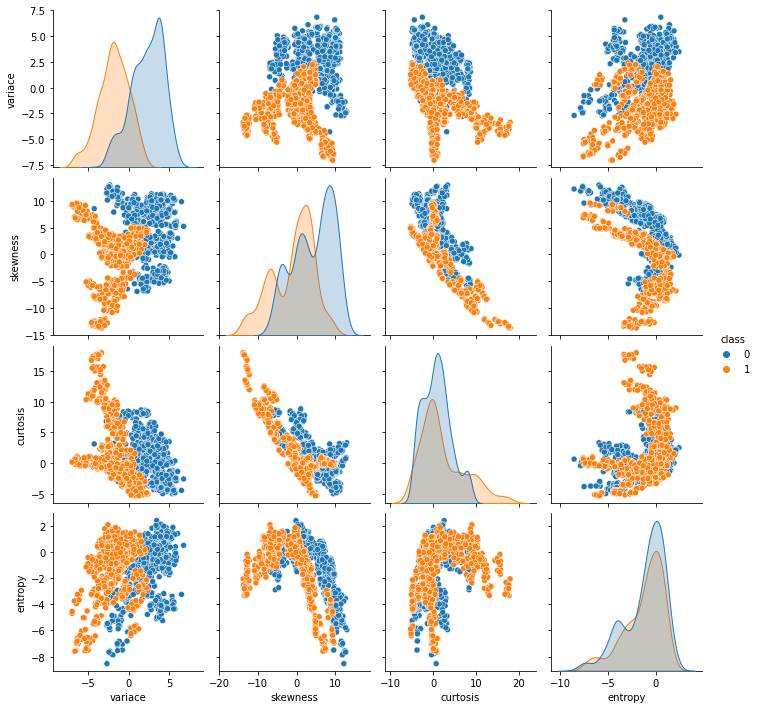

In [6]:
sns.pairplot(notes, hue = "class")

**A binary classification model**

In [7]:
# Features 
X = notes[["variace", "skewness", "curtosis", "entropy"]]

# Target
y = notes["class"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state = 42)

In [9]:
model = Sequential()

model.add(Dense(4, activation = "sigmoid", input_dim = 4))

model.add(Dense(1))

model.compile(optimizer = 'sgd', loss = "binary_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


**Evaluation**

In [10]:
model.fit(X_train, y_train, epochs = 20)

accuracy = model.evaluate(X_test, y_test)[1]

print(accuracy)

Epoch 1/20
35/35 [==============================] - 0s 3ms/step - loss: 2.6012 - accuracy: 0.6664
Epoch 2/20
35/35 [==============================] - 0s 3ms/step - loss: 0.5548 - accuracy: 0.7995
Epoch 3/20
35/35 [==============================] - 0s 3ms/step - loss: 0.3449 - accuracy: 0.8669
Epoch 4/20
35/35 [==============================] - 0s 3ms/step - loss: 0.2492 - accuracy: 0.9034
Epoch 5/20
35/35 [==============================] - 0s 3ms/step - loss: 0.2006 - accuracy: 0.9198
Epoch 6/20
35/35 [==============================] - 0s 3ms/step - loss: 0.1569 - accuracy: 0.9335
Epoch 7/20
35/35 [==============================] - 0s 3ms/step - loss: 0.1313 - accuracy: 0.9398
Epoch 8/20
35/35 [==============================] - 0s 3ms/step - loss: 0.1145 - accuracy: 0.9526
Epoch 9/20
35/35 [==============================] - 0s 3ms/step - loss: 0.1008 - accuracy: 0.9553
Epoch 10/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9590
Epoch 11/20
35/35 [

### Multi Class Classification

In [11]:
dart = pd.read_csv("darts.csv")
dart[:3]

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael


**Convert labels into encoding**

In [12]:
dart["competitor_label"] = pd.Categorical(dart["competitor"])
dart["competitor_label"] = dart["competitor_label"].cat.codes

**Convert target into categorical**

In [13]:
# Features
X = dart[["xCoord", "yCoord"]]

# Target
y = to_categorical(dart["competitor_label"])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

**Modeling**

In [15]:
model = Sequential()

model.add(Dense(128, activation = "relu", input_dim = 2))

model.add(Dense(64, activation = "relu"))

model.add(Dense(32, activation = "relu"))

model.add(Dense(4, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

**Evaluation**

In [16]:
model.fit(X_train, y_train, epochs = 200)

print("\n")

accurary = model.evaluate(X_test, y_test)[1]
print(accuracy)

Epoch 1/200
20/20 [==============================] - 0s 6ms/step - loss: 1.3818 - accuracy: 0.2859
Epoch 2/200
20/20 [==============================] - 0s 5ms/step - loss: 1.3461 - accuracy: 0.3203
Epoch 3/200
20/20 [==============================] - 0s 6ms/step - loss: 1.2918 - accuracy: 0.3703
Epoch 4/200
20/20 [==============================] - 0s 6ms/step - loss: 1.2095 - accuracy: 0.5281
Epoch 5/200
20/20 [==============================] - 0s 6ms/step - loss: 1.1018 - accuracy: 0.5469
Epoch 6/200
20/20 [==============================] - 0s 6ms/step - loss: 0.9831 - accuracy: 0.6094
Epoch 7/200
20/20 [==============================] - 0s 6ms/step - loss: 0.9014 - accuracy: 0.6187
Epoch 8/200
20/20 [==============================] - 0s 5ms/step - loss: 0.8525 - accuracy: 0.6500
Epoch 9/200
20/20 [==============================] - 0s 5ms/step - loss: 0.8363 - accuracy: 0.6578
Epoch 10/200
20/20 [==============================] - 0s 5ms/step - loss: 0.8151 - accuracy: 0.6750
Epoch 11/

In [17]:
test_predict = model.predict(X_test)

# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in test_predict]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds_chosen):
    print("{:25} | {}".format(pred,test_predict[i]))

Rounded Model Predictions | True labels
                        2 | [0.28158614 0.02200364 0.6892172  0.00719303]
                        1 | [0.00005386 0.99912137 0.00081906 0.00000577]
                        0 | [0.6466039  0.03646764 0.3094753  0.00745319]
                        2 | [0.12110531 0.01157079 0.8515609  0.01576303]
                        2 | [0.20867345 0.01233933 0.7728416  0.00614565]
                        3 | [0.03584195 0.12280662 0.00008805 0.84126335]
                        1 | [0.00082939 0.99782145 0.00031902 0.00103014]
                        1 | [0.00005349 0.99873513 0.00108119 0.00013025]
                        1 | [0.04810727 0.52637917 0.02808745 0.39742616]
                        1 | [0.00000968 0.99964666 0.00000145 0.00034219]
                        3 | [0.2371774  0.03358584 0.02155935 0.70767736]
                        3 | [0.06036898 0.31249    0.00483541 0.6223056 ]
                        3 | [0.07229246 0.00452653 0.01516913 0.9080119 

**Prediction**

In [18]:
# Print preds vs true values
pred = model.predict([[0.196451, -0.980736]])

np.round(pred)

array([[0., 1., 0., 0.]], dtype=float32)

### Multi Label Classification

In [34]:
irrigation = pd.read_csv("irrigation_machine.csv")
irrigation[:5]

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [35]:
del irrigation["Unnamed: 0"]

In [36]:
# Features
X = irrigation[irrigation.columns.drop(["parcel_0", "parcel_1", "parcel_2"])]

# Target
y = irrigation[["parcel_0", "parcel_1", "parcel_2"]]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [38]:
model = Sequential()

model.add(Dense(64, activation = "relu", input_dim = 20))

model.add(Dense(3, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train, y_train, epochs = 100, validation_split = 0.1)

Epoch 1/100
45/45 [==============================] - 0s 6ms/step - loss: 0.6300 - accuracy: 0.5243 - val_loss: 0.4904 - val_accuracy: 0.5500
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.6139 - val_loss: 0.3939 - val_accuracy: 0.6062
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.6424 - val_loss: 0.3394 - val_accuracy: 0.6062
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.6417 - val_loss: 0.3149 - val_accuracy: 0.6125
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.6396 - val_loss: 0.3091 - val_accuracy: 0.5625
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.6465 - val_loss: 0.3029 - val_accuracy: 0.5688
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.6403 - val_loss: 0.2736 - val_accuracy: 0.5750
Epoch 8/100
4

In [40]:
preds = model.predict(X_test)
preds_round = np.round(preds)
preds_round[:10]

array([[1., 1., 1.],
       [0., 0., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 1.]], dtype=float32)

In [41]:
accuracy = model.evaluate(X_test, y_test)[1]
print(accuracy)

13/13 [==============================] - 0s 3ms/step - loss: 0.2486 - accuracy: 0.5825
0.5824999809265137


**The history callback**

In [42]:
# Train your model and save its history
h_callback = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test))

Epoch 1/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1367 - accuracy: 0.5913 - val_loss: 0.2469 - val_accuracy: 0.6625
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1371 - accuracy: 0.5806 - val_loss: 0.2493 - val_accuracy: 0.6425
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1354 - accuracy: 0.5919 - val_loss: 0.2449 - val_accuracy: 0.6600
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.5900 - val_loss: 0.2457 - val_accuracy: 0.5700
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.5875 - val_loss: 0.2438 - val_accuracy: 0.5900
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1321 - accuracy: 0.6006 - val_loss: 0.2476 - val_accuracy: 0.6350
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1328 - accuracy: 0.5844 - val_loss: 0.2609 - val_accuracy: 0.5200
Epoch 8/50
50/50 [==

**Model Loss**

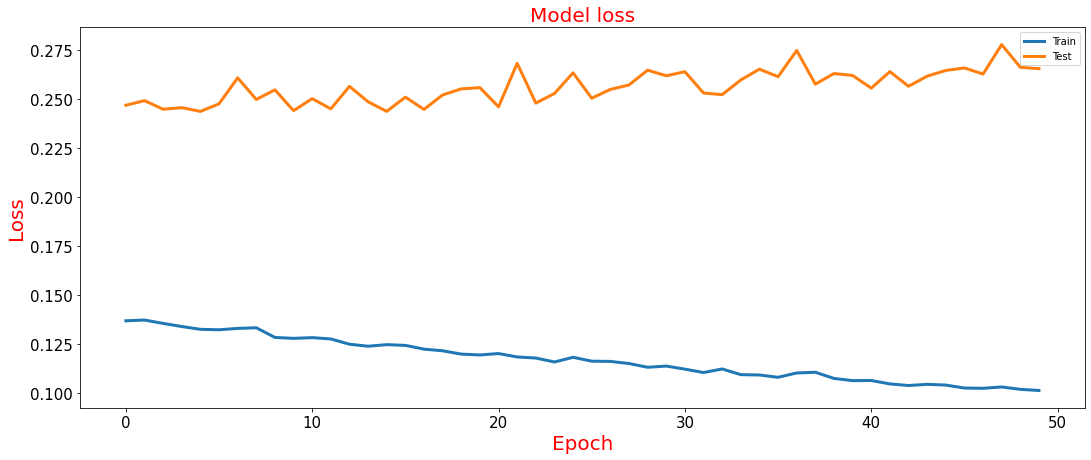

In [52]:
plt.figure(figsize = (18, 7))
plt.plot(h_callback.history["loss"], linewidth = 3)
plt.plot(h_callback.history["val_loss"], linewidth = 3)
plt.title('Model loss', size = 20, color = "red")
plt.ylabel('Loss', size = 20, color = "red")
plt.xlabel('Epoch', size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

**Model Accuracy**

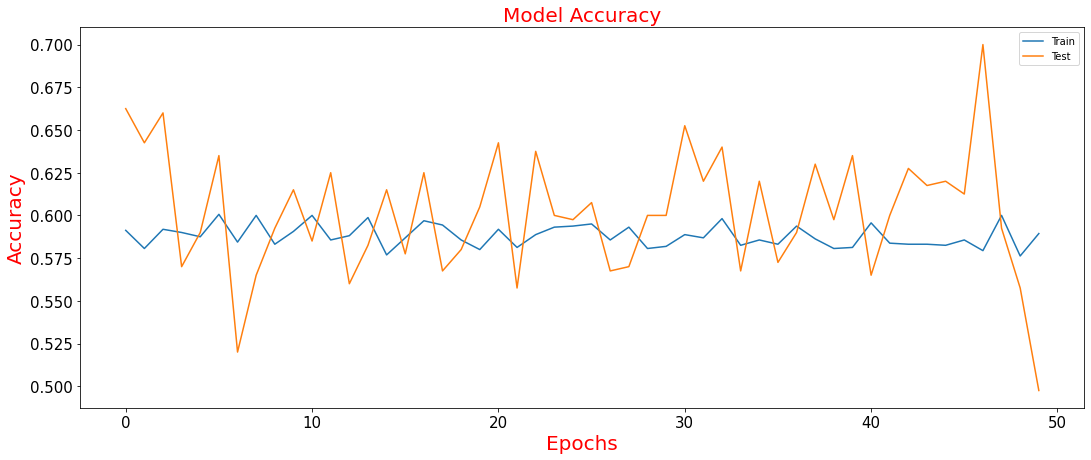

In [60]:
plt.figure(figsize = (18, 7))
plt.plot(h_callback.history["accuracy"], label = "Train")
plt.plot(h_callback.history["val_accuracy"], label = "Test")
plt.xlabel("Epochs", size = 20, color = "red")
plt.ylabel("Accuracy", color = "red", size = 20)
plt.title("Model Accuracy", color = "red", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

**Early Stopping**

In [66]:
# Features 
X = notes[["variace", "skewness", "curtosis", "entropy"]]

# Target
y = notes["class"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [68]:
# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor = "val_accuracy",
                                patience = 5)

In [69]:
model = Sequential()

model.add(Dense(4, activation = "sigmoid", input_dim = 4))

model.add(Dense(1))

model.compile(optimizer = "sgd", loss = "binary_crossentropy", metrics = ["accuracy"])

model.fit(X_train, y_train, epochs = 1000, validation_data = (X_test, y_test), callbacks = [monitor_val_acc])

Epoch 1/1000
35/35 [==============================] - 0s 10ms/step - loss: 4.4464 - accuracy: 0.5451 - val_loss: 3.4856 - val_accuracy: 0.6436
Epoch 2/1000
35/35 [==============================] - 0s 3ms/step - loss: 1.1530 - accuracy: 0.7730 - val_loss: 0.3832 - val_accuracy: 0.8909
Epoch 3/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.8797 - val_loss: 0.2657 - val_accuracy: 0.8909
Epoch 4/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.2282 - accuracy: 0.9143 - val_loss: 0.1926 - val_accuracy: 0.9309
Epoch 5/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.1660 - accuracy: 0.9380 - val_loss: 0.1482 - val_accuracy: 0.9491
Epoch 6/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.9572 - val_loss: 0.1229 - val_accuracy: 0.9600
Epoch 7/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.1073 - accuracy: 0.9672 - val_loss: 0.1061 - val_accuracy: 0.9745
Epoch

### Activation Functions

In [80]:
np.random.seed(1)

In [ ]:
def get_model(act_function):
    
    model = Sequential()
    
    model.add(Dense(4, input_dim = 2, activation = act_function))
    
    model.add(Dense(1, activation = "sigmoid"))
    
    return model

In [ ]:
activation = ['relu', 'sigmoid', 'tanh']

activation_results = {}

for func in activation:
    
    model = get_model(act_function = func)
    
    history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, verbose = 0)
    
    activation_results[func] = history

In [ ]:
val_loss_per_funct = {k:v.history["val_loss"] for k,v in activation_results.items()}

# Turn the dictionary into a pandas dataframe
val_loss_curves = pd.DataFrame(val_loss_per_funct)

# Plot the curves
val_loss_curves.plot(title = "Loss per Activation function")

**Batch Normalization**

In [6]:
x = np.load("digits_pixels.npy")
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
y = np.load("digits_target.npy")
y

array([0, 1, 2, ..., 8, 9, 8], dtype=int64)

In [12]:
model = Sequential()

model.add(Dense(50, input_dim = 64, activation = "relu", kernel_initializer = "normal"))
model.add(BatchNormalization())

model.add(Dense(50, activation = "relu", kernel_initializer = "normal"))
model.add(BatchNormalization())

model.add(Dense(50, activation = "relu", kernel_initializer = "normal"))
model.add(BatchNormalization())

model.add(Dense(1, activation = "softmax", kernel_initializer = "normal"))

model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])

### Hyperparameter Tuning

In [68]:
bc = pd.read_csv("data.csv")
bc[:5]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [69]:
# Delete Unnecessary Columns

del bc["id"]
del bc["Unnamed: 32"]

In [70]:
# Malignant = 1 & Banigin = 0
 
bc["diagnosis"] = bc["diagnosis"].replace({"M": 1, "B":0})

In [71]:
# Categorical Column

bc["diagnosis"] = bc["diagnosis"].astype("category")

In [72]:
# Features
X = bc[bc.columns.drop(["diagnosis"])]

# Target
y = bc["diagnosis"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

**Model Building**

In [74]:
# Creates a model given an activation and learning rate
def create_model(learning_rate, activation):
    
    # Create an Adam optimizer with the given learning rate
    opt = keras.optimizers.Adam(lr = learning_rate)
    
    # Create binary classification model 
    model = Sequential()
    model.add(Dense(128, activation = activation, input_dim = 30))
    model.add(Dense(256, activation = activation))
    model.add(Dense(1, activation = "sigmoid"))
    
    # Compile your model with your optimizer, loss, and metrics
    model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])
    
    return model

In [75]:
# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {"activation": ["relu", "tanh"],
          "batch_size": [32, 128, 256],
          "epochs": [50, 100, 200],
          "learning_rate": [0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

In [76]:
model = KerasClassifier(build_fn = create_model(learning_rate = 0.001, activation = "relu"),
                        epochs = 50,
                        batch_size = 128,
                        verbose = 0)

In [ ]:
# Calculate the accuracy score for each fold
kfolds = cross_val_score(model, X_train, y_train, cv = 3)

In [87]:
# Creates a model given an activation and learning rate
def create_model(learning_rate, activation):
  
    # Create an Adam optimizer with the given learning rate
    opt = keras.optimizers.Adam(lr = learning_rate)
    
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(128, input_shape = (30,), activation = activation))
    model.add(Dense(256, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile your model with your optimizer, loss, and metrics
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [88]:
# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation': ['relu', 'tanh'], 'batch_size': [32, 128, 256], 
          'epochs': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

In [ ]:
# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model(learning_rate = 0.001, activation = "relu"), epochs = 50, 
             batch_size = 128, verbose = 0)

# Calculate the accuracy score for each fold
kfolds = cross_val_score(model, X, y, cv = 3)

# Print the mean accuracy
print('The mean accuracy was:', kfolds.mean())

# Print the accuracy standard deviation
print('With a standard deviation of:', kfolds.std())

### LSTM

In [105]:
text = 'it is not the strength of the body but the strength of the spirit it is useless to meet revenge with revenge it will heal nothing even the smallest person can change the course of history all we have to decide is what to do with the time that is given us the burned hand teaches best after that advice about fire goes to the heart'

In [106]:
# Split text into an array of words
words = text.split()

# Make sentences of 4 words each, moving one word at a time
sentences = []
for i in range(4, len(words) + 1):
    sentences.append(" ".join(words[i - 4: i]))

In [107]:
# Instantiate a Tokenizer, then fit it on the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

sequences = tokenizer.texts_to_sequences(sentences)

In [123]:
model = Sequential()

# Add an Embedding layer with the right parameters
model.add(Embedding(input_dim = len(set(words)), input_length = 3, output_dim = 8))
          
# Add a 32 unit LSTM layer
model.add(LSTM(32))

# Add a hidden Dense layer of 32 units and an output layer of vocab_size with softmax
model.add(Dense(32, activation = "relu"))

model.add(Dense(len(set(words)), activation = "softmax"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3, 8)              352       
_________________________________________________________________
lstm (LSTM)                  (None, 32)                5248      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_27 (Dense)             (None, 44)                1452      
Total params: 8,108
Trainable params: 8,108
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy")

In [125]:
def predict_text(test_text, model = model):
    if len(test_text.split()) != 3:
        print('Text input should be 3 words!')
        return False
  
  # Turn the test_text into a sequence of numbers
    test_seq = tokenizer.texts_to_sequences([test_text])
    test_seq = np.array(test_seq)
  
  # Use the model passed as a parameter to predict the next word
    pred = model.predict(test_seq).argmax(axis = 1)[0]
  
  # Return the word that maps to the prediction
    return tokenizer.index_word[pred]

In [133]:
predict_text("strength of the")

'time'